In [2]:
import pandas as pd
import numpy as np


In [3]:
data=pd.read_csv('Assignment1_data.csv')

In [4]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           100000 non-null  object 
 1   Location       100000 non-null  object 
 2   MinTemp        99564 non-null   float64
 3   MaxTemp        99784 non-null   float64
 4   Rainfall       99030 non-null   float64
 5   Evaporation    57367 non-null   float64
 6   Sunshine       52518 non-null   float64
 7   WindGustDir    93419 non-null   object 
 8   WindGustSpeed  93460 non-null   float64
 9   WindDir9am     92938 non-null   object 
 10  WindDir3pm     97309 non-null   object 
 11  WindSpeed9am   99062 non-null   float64
 12  WindSpeed3pm   98146 non-null   float64
 13  Humidity9am    98762 non-null   float64
 14  Humidity3pm    97456 non-null   float64
 15  Pressure9am    90163 non-null   float64
 16  Pressure3pm    90188 non-null   float64
 17  Cloud9am       62372 non-null 

In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
data.isnull().sum()/(len(data))*100

Date              0.000
Location          0.000
MinTemp           0.436
MaxTemp           0.216
Rainfall          0.970
Evaporation      42.633
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     6.540
WindDir9am        7.062
WindDir3pm        2.691
WindSpeed9am      0.938
WindSpeed3pm      1.854
Humidity9am       1.238
Humidity3pm       2.544
Pressure9am       9.837
Pressure3pm       9.812
Cloud9am         37.628
Cloud3pm         40.011
Temp9am           0.620
Temp3pm           1.910
RainToday         0.970
RainTomorrow      0.000
dtype: float64

## 1.	Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill. Also find the sunny places to setup a solar field. Take values more than 75 percentile as minimum values for analysis.

In [5]:
# Windy Places to build WindMill
data['wind_avg']=(data['WindSpeed9am']+data['WindSpeed3pm'])/2
wind_q75=data['wind_avg'].quantile(.75)

data_windy=data[data['wind_avg']> wind_q75]
data_windy.groupby(['Location'])['wind_avg'].mean().sort_values(ascending=False).head(5)

Location
Newcastle           31.320000
Melbourne           29.980392
MelbourneAirport    29.854103
Sale                28.845440
GoldCoast           28.663569
Name: wind_avg, dtype: float64

In [8]:
#b Sunny Places to set up Solar Field
q75_sunshine=data['Sunshine'].quantile(.75)
data_sunshine=data[data['Sunshine']> q75_sunshine]
data_sunshine.groupby(['Location'])['Sunshine'].mean().sort_values(ascending=False).head(5)

Location
WaggaWagga    12.230000
Dartmoor      12.208955
Adelaide      12.171390
PearceRAAF    12.167286
Portland      12.161458
Name: Sunshine, dtype: float64

In [9]:
data=data.drop('wind_avg',axis=1)

## Q2	Find the locations where humidity and temperature are more than 80 percentile value 

In [10]:
#Q2
# for temperature two columns are given, a new column AvgTemp will be created, simliary for Humidty a new AvgHum
# will be created
data['AvgTemp']=(data['MinTemp']+data['MaxTemp'])/2
data['AvgHum']=(data['Humidity9am']+data['Humidity3pm'])/2
temp_80=data['AvgTemp'].quantile(0.80)
hum_80=data['AvgHum'].quantile(0.80)
print(temp_80,hum_80)
ind=data[(data['AvgTemp']>23.45 ) & (data['AvgHum']>76.0)].index
data1=data.loc[ind,['Location','AvgTemp','AvgHum']]
data1.groupby(['Location'])[['AvgTemp','AvgHum']].mean().head(5)

23.45 76.0


,AvgTemp,AvgHum
Location,,
Adelaide,25.416667,81.333333
Albany,25.825000,83.750000
Albury,24.920000,82.300000
AliceSprings,25.246429,81.928571
BadgerysCreek,24.858696,79.826087


## Q3.	Find 3 places where rainfall, sunshine, humidity is not too high or too low
[ Use logical threshold using percentile values]

In [11]:

#[ Use logical threshold using percentile values]

print(data['Rainfall'].describe()) # seems outlier median can be used
#data['Rainfall'].quantile(.95)
print(data['Rainfall'].value_counts().sort_values())
#data['Rainfall'].plot(kind='kde')
#data['Rainfall'].nunique() #604
data['Rainfall'].quantile(.75) # 0.6
df_rain=data[data['Rainfall']> 0.6]   
len(df_rain)
df_rain.head(3)
df_rain['Rainfall'].describe()
lr=data['Rainfall'].quantile(.94) # 11
hr=data['Rainfall'].quantile(.98) # 25.2
 # rain value between 11 and 30 assuming rainfall is in inches


count    99030.000000
mean         2.346882
std          8.357515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max        278.400000
Name: Rainfall, dtype: float64
219.6        1
78.8         1
66.0         1
68.8         1
141.2        1
         ...  
0.8       1425
0.6       1866
0.4       2666
0.2       6127
0.0      63506
Name: Rainfall, Length: 604, dtype: int64


In [12]:
data['Sunshine'].describe() 
ls=data['Sunshine'].quantile(.5) # 8.5 hours
hs=data['Sunshine'].quantile(.75) # 10.6 hours

In [13]:
data['AvgHum'].describe() # between 30 to 50 is moderate humidity
lh=data['AvgHum'].quantile(.07) # 31
hh=data['AvgHum'].quantile(.30) # 50

In [14]:
df2=data[((data['AvgHum']>lh) &(data['AvgHum']<hh)) &((data['Sunshine']>ls)&(data['Sunshine']<hs))&
     (data['Rainfall']>lr )&(data['Rainfall']>hr)]
df2.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,AvgTemp,AvgHum
44170,8/12/2014,Moree,22.5,34.2,44.8,37.6,9.9,W,48.0,N,...,1008.4,1007.7,7.0,6.0,25.6,33.5,Yes,No,28.35,49.0
59062,26-02-2016,AliceSprings,22.0,34.8,26.2,16.8,9.7,ESE,39.0,SE,...,1016.0,1012.2,7.0,3.0,27.8,34.2,Yes,No,28.40,35.0
73642,3/9/2016,SydneyAirport,15.1,20.9,26.0,2.2,9.1,WNW,76.0,WNW,...,998.1,1004.6,4.0,5.0,19.1,20.6,Yes,No,18.00,39.5


# Q4 Find top 5 coastal cities in which evaporation is higher than mean so  that we can choose these places for salt preparation plants?

In [15]:
data['Evaporation'].describe()

count    57367.000000
mean         5.467535
std          4.186620
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

In [16]:
# from data['Evaporation'] checked the mean
df3=data[data['Evaporation']>5.46]
df3.sort_values('Evaporation',ascending=False)
#df3.groupby('Location')['Evaporation'].mean().sort_values(ascending=False)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,AvgTemp,AvgHum
29867,19-12-2016,Williamtown,15.3,23.9,58.2,145.0,NaN,NaN,NaN,NaN,...,1020.8,1017.0,8.0,1.0,19.1,23.0,Yes,No,19.60,62.0
28413,11/11/2016,Cobar,19.1,35.3,0.0,86.2,NaN,NNW,35.0,NW,...,1009.3,1004.6,NaN,NaN,26.7,34.1,No,No,27.20,NaN
96990,7/1/2013,Woomera,24.6,45.3,0.0,82.4,NaN,SE,74.0,ESE,...,1013.8,1009.4,0.0,1.0,31.8,44.0,No,No,34.95,15.5
23713,9/1/2010,Woomera,26.6,41.7,0.0,81.2,13.2,N,48.0,NE,...,1013.9,1011.9,0.0,4.0,33.6,40.3,No,No,34.15,16.0
21307,23-12-2013,Woomera,14.4,27.2,3.0,77.3,NaN,S,56.0,S,...,1016.1,1015.2,1.0,7.0,17.0,24.9,Yes,No,20.80,47.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32413,7/3/2017,Richmond,16.3,26.1,1.0,5.5,NaN,SE,46.0,SSW,...,1018.1,1016.7,8.0,5.0,19.9,25.5,No,No,21.20,56.5
70860,28-09-2016,Richmond,3.4,21.7,0.0,5.5,NaN,NaN,NaN,NNE,...,1014.9,1010.1,NaN,NaN,14.7,21.0,No,Yes,12.55,43.0
63949,15-09-2015,Nuriootpa,7.7,14.2,2.1,5.5,6.0,NaN,33.0,NaN,...,1020.4,1019.6,7.0,5.0,9.9,12.8,Yes,No,10.95,68.0
46130,30-11-2013,Bendigo,8.6,24.8,0.0,5.5,NaN,SSE,43.0,SE,...,1019.9,1018.2,NaN,NaN,14.9,22.8,No,No,16.70,43.5


In [17]:
df3.groupby('Location')['Evaporation'].sum().sort_values(ascending=False).head(5)

Location
Woomera         16055.3
AliceSprings    15903.0
Townsville      12820.7
Darwin          10911.4
Moree            9950.5
Name: Evaporation, dtype: float64

## Q5 .	Suggest a strategy to a winter goods company to choose the location and months to promote their products. 


In [18]:
 
# Date column to  get months years

import datetime 
# date to year, month,day

data['Date']=pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month_name()
data['Day']=data['Date'].dt.day
data.head()
data=data.drop('Date',axis=1)

In [19]:
data['MinTemp'].describe()

count    99564.000000
mean        12.190559
std          6.412850
min         -8.500000
25%          7.600000
50%         12.000000
75%         16.900000
max         33.900000
Name: MinTemp, dtype: float64

In [20]:
ind=data[data['MinTemp']< (data['MinTemp'].quantile(.50))].index
df_winter=data.loc[ind,['Location','Month','MinTemp']]



In [21]:
df_winter.groupby(['Location','Month'])['MinTemp'].mean().sort_values(ascending=True).head(15)

Location     Month    
MountGinini  July        -0.448765
             August       0.077922
             June         0.772781
             September    1.314935
             May          1.517610
Canberra     July         1.850838
             August       2.122093
             June         2.168889
Tuggeranong  July         2.201242
             August       2.479739
             May          2.650888
Canberra     May          2.651456
Tuggeranong  June         2.740789
MountGinini  October      2.780357
             April        3.255128
Name: MinTemp, dtype: float64

## Q6  Create a new column as rainfall level with values as no, low, medium, high, heavy as categories and do the bivariate analyses between rainfall level and wind direction


- no rain    ------> 0 percentile
-low --------->0-25 percentile
-medium--------->25-50 percentile
-high--------->50-75 percentile
-heavy--------->75-100 percentile


In [22]:
q0=data['Rainfall'].quantile(0) #0
q25=data['Rainfall'].quantile(.25) #0
q50=data['Rainfall'].quantile(.50)# 0
q75=data['Rainfall'].quantile(.75)# 0.6
q1=data['Rainfall'].quantile(1)# 278.4

In [23]:
# divide length of rainfall coulumn into 4 parts data0=data[data['Rainfall']>   
len(data['Rainfall'])
data['RainfallLevel']=data['Rainfall']


In [24]:
data['RainfallLevel'].loc[:25000]='Low rain'
data['RainfallLevel'].loc[25000:50000]='medium rain'
data['RainfallLevel'].loc[50000:75000]='high'
data['RainfallLevel'].loc[75000:100000]='Heavy'

C:\Users\warda\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:

print("The unique levels in RainfallLevel are :", data['RainfallLevel'].nunique())
data['RainfallLevel']

The unique levels in RainfallLevel are : 4


0        Low rain
1        Low rain
2        Low rain
3        Low rain
4        Low rain
           ...   
99995       Heavy
99996       Heavy
99997       Heavy
99998       Heavy
99999       Heavy
Name: RainfallLevel, Length: 100000, dtype: object

In [26]:
#Bivariate Analysis
#1. data['WindDir9am'] VS data['RainfallLevel']
pd.crosstab(data['RainfallLevel'],data['WindDir9am'])

WindDir9am,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainfallLevel,,,,,,,,,,,,,,,,
Heavy,1629,1335,1342,1985,1327,1409,1367,1484,1520,1574,1575,1299,1442,1484,1246,1164
Low rain,1564,1337,1381,1991,1334,1355,1412,1529,1457,1672,1557,1313,1433,1377,1289,1216
high,1531,1349,1362,1964,1328,1388,1400,1540,1536,1598,1595,1342,1444,1450,1282,1209
medium rain,1640,1385,1287,2056,1307,1399,1323,1516,1472,1577,1590,1318,1454,1432,1241,1224


In [27]:
#1. data['WindDir3pm'] VS data['RainfallLevel']
pd.crosstab(data['RainfallLevel'],data['WindDir3pm'])

WindDir3pm,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainfallLevel,,,,,,,,,,,,,,,,
Heavy,1495,1354,1479,1473,1419,1107,1351,1512,1728,1858,1650,1425,1641,1706,1496,1631
Low rain,1451,1416,1445,1510,1443,1123,1358,1564,1682,1877,1538,1451,1618,1722,1489,1645
high,1420,1314,1459,1502,1441,1151,1339,1430,1621,1937,1611,1478,1582,1812,1549,1699
medium rain,1411,1360,1485,1584,1439,1166,1351,1491,1676,1896,1631,1373,1605,1692,1527,1620


## Q7.	Plot the correlation heatmap between the numerical variables.

In [28]:
num_data=data.select_dtypes(include=np.number)
import seaborn as sb
import matplotlib.pyplot as plt


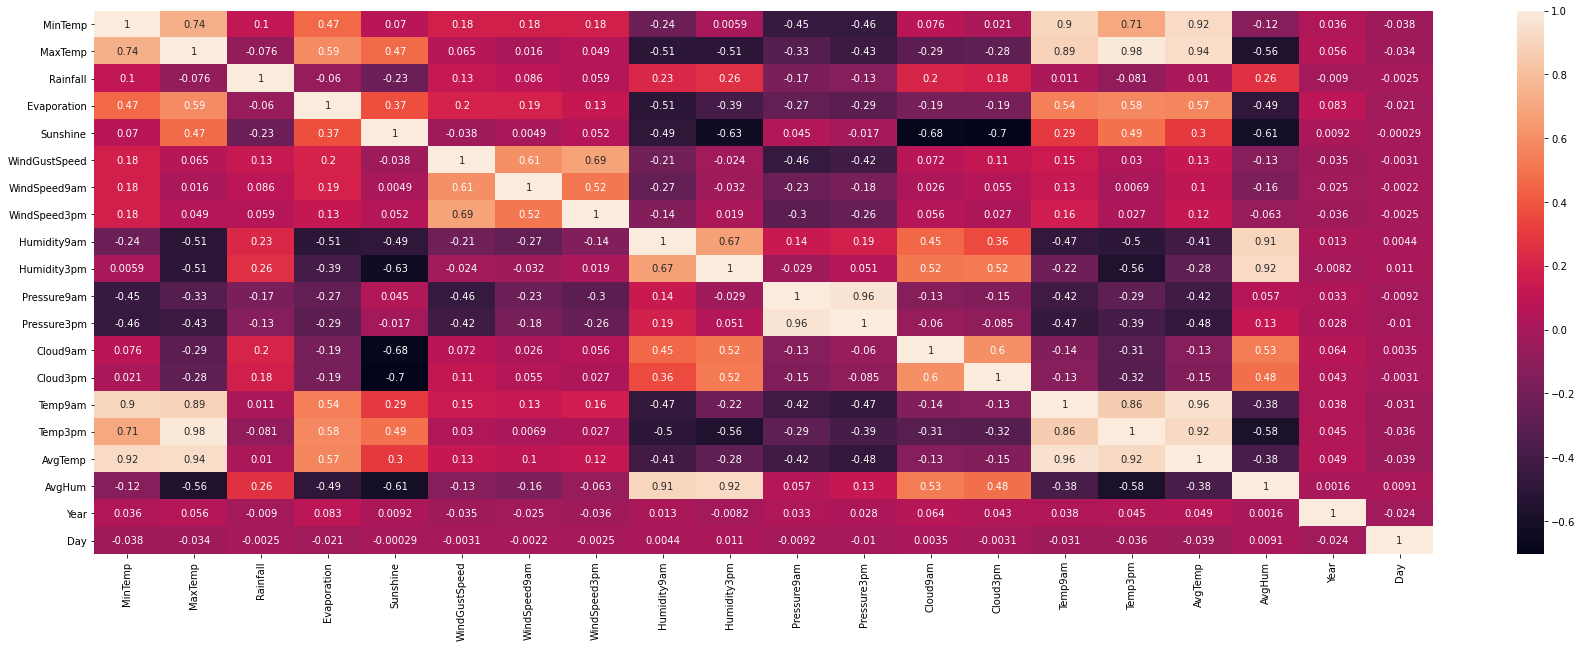

In [29]:
num_data=data.select_dtypes(include=np.number)
corr_matrix=num_data.corr()
plt.figure(figsize=(30,10))
sb.heatmap(corr_matrix,annot=True)
plt.show()

In [30]:
data=data.drop(['RainfallLevel'],axis=1)

## Q8.	Perform the appropriate Missing value treatments for each columns

a.	Compute the percentage of missing values

b.	Explore dropping the row or dropping the column strategy is appropriate for this data

c.	Explore mean/median imputation is preferable for any column

d.	Explore groupby based imputation

e.	Explore mode based and rule based imputation for categorical columns

f.	Make sure before and after imputations the characteristics of data remain same.


## a. Percentage of missing values

In [31]:

data=pd.read_csv('Assignment1_data.csv')

(data.isnull().sum()/len(data))*100

Date              0.000
Location          0.000
MinTemp           0.436
MaxTemp           0.216
Rainfall          0.970
Evaporation      42.633
Sunshine         47.482
WindGustDir       6.581
WindGustSpeed     6.540
WindDir9am        7.062
WindDir3pm        2.691
WindSpeed9am      0.938
WindSpeed3pm      1.854
Humidity9am       1.238
Humidity3pm       2.544
Pressure9am       9.837
Pressure3pm       9.812
Cloud9am         37.628
Cloud3pm         40.011
Temp9am           0.620
Temp3pm           1.910
RainToday         0.970
RainTomorrow      0.000
dtype: float64

## b) Explore dropping the row or dropping the column strategy is appropriate for this data

In [32]:
data1=data.dropna()
print("The length of data before dropping NAN:",len(data))
print("The length of data after dropping NAN:",len(data1))

The length of data before dropping NAN: 100000
The length of data after dropping NAN: 39869


In [33]:
data1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [34]:
length_of_data_lost=(len(data)-len(data1))/len(data)*100
print("The percentage of data lost by dropping rows is:",length_of_data_lost)

The percentage of data lost by dropping rows is: 60.131


In [35]:
# The percentage of data lost in dropping the rows is 60% , which is  way too much of data lost, 
# so dropping NAN values in not an appropiate approach.


In [36]:
# dropping the columns
# Evaporation 42.633%,Sunshine 47.482%,Cloud9am 37.628%,Cloud3pm 40.011%
# The percentage of NAN's in Evaporation,Sunshine,Cloud9am and Cloudpm is more than or almost near 40%. We can drop
# these columns. 
data=data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)

In [37]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## c. Explore mean/median imputation is preferable for any column

In [38]:

#MinTemp
data['MinTemp'].mean() #12.190558836527169
data['MinTemp'].describe()

count    99564.000000
mean        12.190559
std          6.412850
min         -8.500000
25%          7.600000
50%         12.000000
75%         16.900000
max         33.900000
Name: MinTemp, dtype: float64

<AxesSubplot:ylabel='Density'>

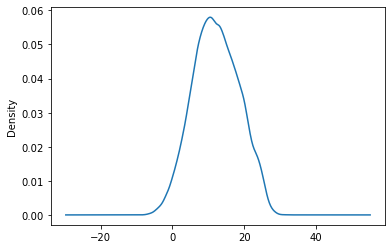

In [39]:
data['MinTemp'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

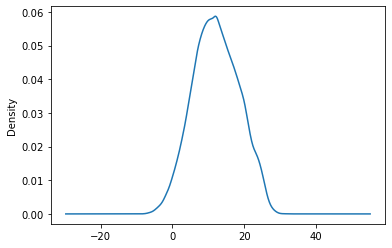

In [40]:
# filling the NA values with mean\
#Mean Imputation
data['MinTemp'].fillna(data['MinTemp'].mean()).plot(kind='kde')


In [41]:
# The distribution after filling NA values looks unchanged, it means we can impute na values with mean.


<AxesSubplot:ylabel='Density'>

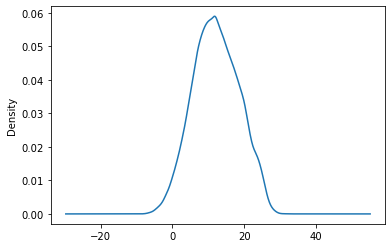

In [42]:
#Median Imputation
data['MinTemp'].fillna(data['MinTemp'].median()).plot(kind='kde')

In [43]:
# The median imputation does not change the distribution, we can also impute null values with it.As the percentage 
# of data being filled is less than 3%, we can impute with mean
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data['MinTemp'].isnull().sum()

0

In [44]:
#.MaxTemp
data['MaxTemp'].describe()

count    99784.000000
mean        23.228404
std          7.117851
min         -4.800000
25%         17.900000
50%         22.600000
75%         28.200000
max         47.300000
Name: MaxTemp, dtype: float64

<AxesSubplot:ylabel='Density'>

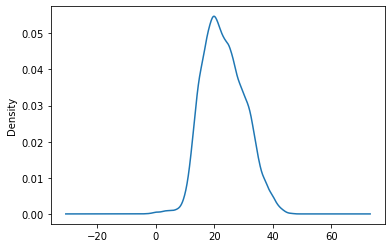

In [45]:
# filling the NA values with mean\
# distribution before imputing it
data['MaxTemp'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

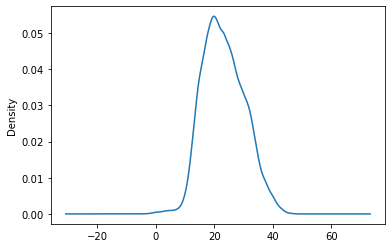

In [46]:
# filling the NA values with mean
#Mean Imputation
data['MaxTemp'].fillna(data['MaxTemp'].mean()).plot(kind='kde')

In [47]:
data['MaxTemp'].fillna(data['MaxTemp'].mean()).describe()

count    100000.000000
mean         23.228404
std           7.110159
min          -4.800000
25%          18.000000
50%          22.700000
75%          28.200000
max          47.300000
Name: MaxTemp, dtype: float64

In [48]:
# The distribution before and after the mean imputationn is similar , we can impute the null values with mean.


<AxesSubplot:ylabel='Density'>

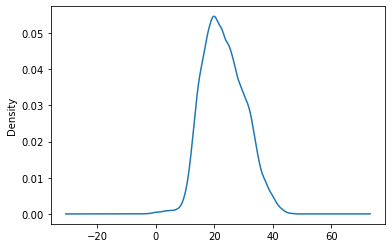

In [49]:
#median imputation
data['MaxTemp'].fillna(data['MaxTemp'].median()).plot(kind='kde')

In [50]:
# The distribution before and after the mean imputation is similar , we can impute the null values with median.
data['MaxTemp']=data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['MaxTemp'].isnull().sum()

0

In [51]:
#.Rainfall
data['Rainfall'].describe()

count    99030.000000
mean         2.346882
std          8.357515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max        278.400000
Name: Rainfall, dtype: float64

<AxesSubplot:ylabel='Density'>

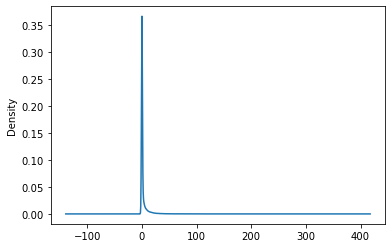

In [52]:
data['Rainfall'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

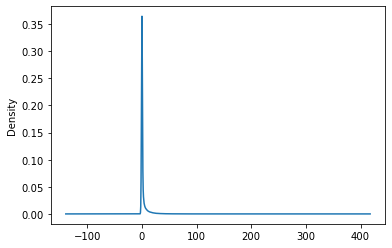

In [53]:
data['Rainfall'].fillna(data['Rainfall'].mean()).plot(kind='kde')

In [54]:
data['Rainfall'].fillna(data['Rainfall'].mean()).describe()

count    100000.000000
mean          2.346882
std           8.316881
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         278.400000
Name: Rainfall, dtype: float64

<AxesSubplot:ylabel='Density'>

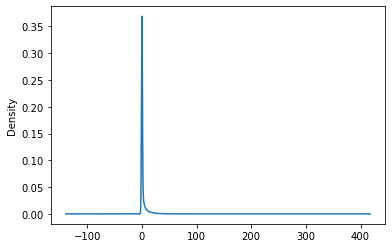

In [55]:
# The distribution before and after the mean imputation looks similar, we can use mean value to impute the 
# null values.
#Median Imputation
data['Rainfall'].fillna(data['Rainfall'].median()).plot(kind='kde')

In [56]:
# The distribution before and after the median imputation looks similar, we can use median value to impute the 
# null values.
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data['Rainfall'].isnull().sum()

0

In [57]:
#.WindGustSpeed
data['WindGustSpeed'].describe()

count    93460.000000
mean        39.986818
std         13.589459
min          7.000000
25%         31.000000
50%         39.000000
75%         48.000000
max        135.000000
Name: WindGustSpeed, dtype: float64

<AxesSubplot:ylabel='Density'>

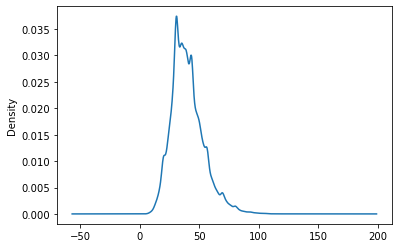

In [58]:
# the distribution before imputation
data['WindGustSpeed'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

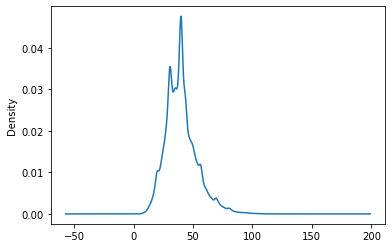

In [59]:
# The distribution after imputation
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean()).plot(kind='kde')

In [60]:
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean()).describe()
# The distribution from the peak changes after imputation, we cant use mean imputaion.


count    100000.000000
mean         39.986818
std          13.137565
min           7.000000
25%          31.000000
50%          39.000000
75%          46.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

<AxesSubplot:ylabel='Density'>

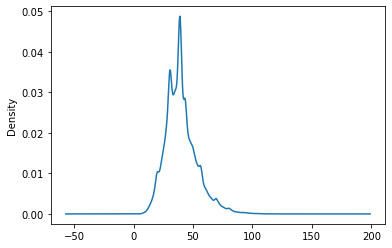

In [61]:
#Median Imputation
data['WindGustSpeed'].fillna(data['WindGustSpeed'].median()).plot(kind='kde')

In [62]:
data['WindGustSpeed'].fillna(data['WindGustSpeed'].median()).describe()

count    100000.000000
mean         39.922280
std          13.139831
min           7.000000
25%          31.000000
50%          39.000000
75%          46.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [63]:
# The distribution from the peak changes after imputation, we cant use median imputaion.


In [64]:
#.WindSpeed9am
data['WindSpeed9am'].describe()

count    99062.000000
mean        14.008045
std          8.898406
min          0.000000
25%          7.000000
50%         13.000000
75%         19.000000
max        130.000000
Name: WindSpeed9am, dtype: float64

<AxesSubplot:ylabel='Density'>

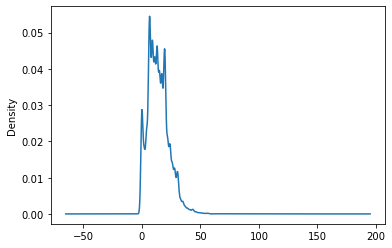

In [65]:
#the distribution before imputation
data['WindSpeed9am'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

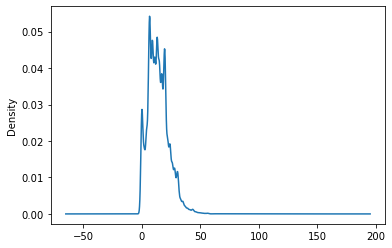

In [66]:
#the distribution after imputation
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean()).plot(kind='kde')

In [67]:
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean()).describe()
# The distribution remains unchaged after mean imputation, we can use mean to fill null values.


count    100000.000000
mean         14.008045
std           8.856573
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64

<AxesSubplot:ylabel='Density'>

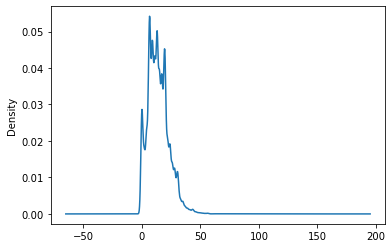

In [68]:
#Median Imputation
#the distribution before imputation
data['WindSpeed9am'].fillna(data['WindSpeed9am'].median()).plot(kind='kde')


In [69]:
## The distribution remains unchaged after median imputation, we can use median to fill null values.
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed9am'].isnull().sum()

0

In [70]:
#.WindSpeed3pm
data['WindSpeed3pm'].describe()

count    98146.000000
mean        18.623846
std          8.797918
min          0.000000
25%         13.000000
50%         19.000000
75%         24.000000
max         87.000000
Name: WindSpeed3pm, dtype: float64

<AxesSubplot:ylabel='Density'>

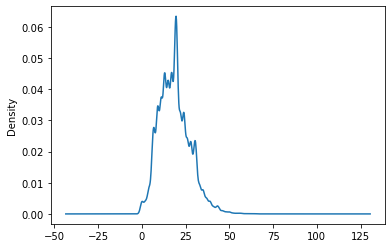

In [71]:
#The distribution before imputation
data['WindSpeed3pm'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

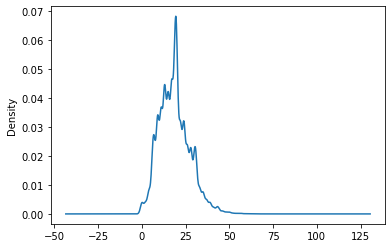

In [72]:
#The distribution after Mean imputation
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean()).plot(kind='kde')

In [73]:
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean()).describe()
## The distribution remains unchaged after mean imputation, we can use mean to fill null values.

count    100000.000000
mean         18.623846
std           8.715979
min           0.000000
25%          13.000000
50%          18.623846
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64

<AxesSubplot:ylabel='Density'>

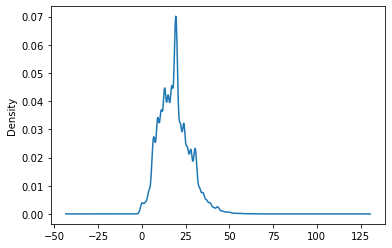

In [74]:
#Median Imputation
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].median()).plot(kind='kde')

In [75]:
## The distribution remains unchaged after median imputation, we can use median to fill null values.
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['WindSpeed3pm'].isnull().sum()

0

In [76]:
#.Humidity9am
data['Humidity9am'].describe()

count    98762.000000
mean        68.845599
std         19.064754
min          1.000000
25%         57.000000
50%         70.000000
75%         83.000000
max        100.000000
Name: Humidity9am, dtype: float64

<AxesSubplot:ylabel='Density'>

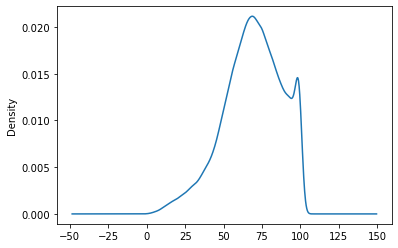

In [77]:
#The distribution before imputation
data['Humidity9am'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

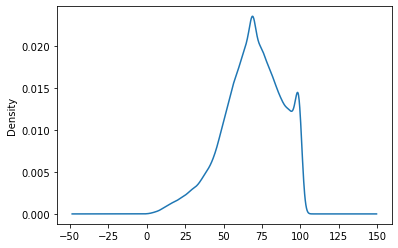

In [78]:
#Mean imputation and distribution after imputing null with it.
data['Humidity9am'].fillna(data['Humidity9am'].mean()).plot(kind='kde')

In [79]:
data['Humidity9am'].fillna(data['Humidity9am'].mean()).describe()
# The distribution is changed after mean imputaion, we cant use it.


count    100000.000000
mean         68.845599
std          18.946374
min           1.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

<AxesSubplot:ylabel='Density'>

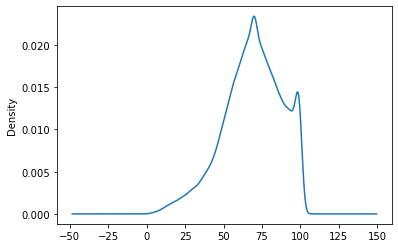

In [80]:
#Median Imputation
data['Humidity9am'].fillna(data['Humidity9am'].median()).plot(kind='kde')

In [81]:
# The distribution is changed after median imputaion, we cant use it.


In [82]:
#.Humidity3pm
data['Humidity3pm'].describe()

count    97456.000000
mean        51.491155
std         20.824180
min          0.000000
25%         37.000000
50%         52.000000
75%         66.000000
max        100.000000
Name: Humidity3pm, dtype: float64

<AxesSubplot:ylabel='Density'>

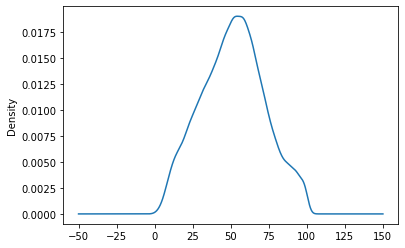

In [83]:
# the distribution before imputing values
data['Humidity3pm'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

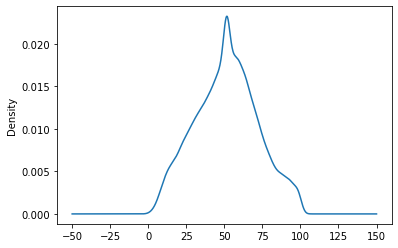

In [84]:
# mean imputation and distribution after it
data['Humidity3pm'].fillna(data['Humidity3pm'].mean()).plot(kind='kde')

In [85]:
# the distributin is changed after mean imputation, we cant use it for imputing nul values.


<AxesSubplot:ylabel='Density'>

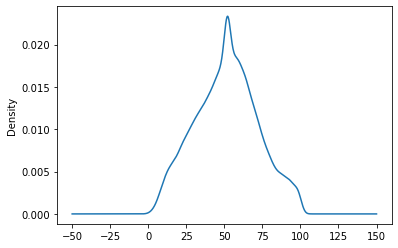

In [86]:
#Median Imputation
data['Humidity3pm'].fillna(data['Humidity3pm'].median()).plot(kind='kde')

In [87]:
# the distributin is changed after median imputation, we cant use it for imputing nul values.


In [88]:
#.Pressure9am
data['Pressure9am'].describe()

count    90163.000000
mean      1017.631809
std          7.105450
min        980.500000
25%       1012.900000
50%       1017.600000
75%       1022.400000
max       1041.000000
Name: Pressure9am, dtype: float64

<AxesSubplot:ylabel='Density'>

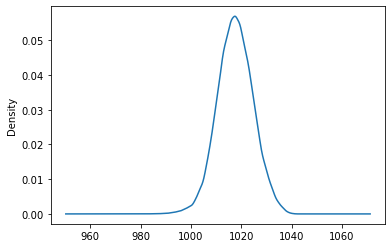

In [89]:
# distribution before imputation
data['Pressure9am'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

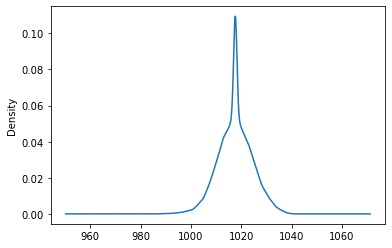

In [90]:
# distribution after mean imputation
data['Pressure9am'].fillna(data['Pressure9am'].mean()).plot(kind='kde')

In [91]:
# The distribution is changed after mean imputation, we cant fill null values with its mean.


<AxesSubplot:ylabel='Density'>

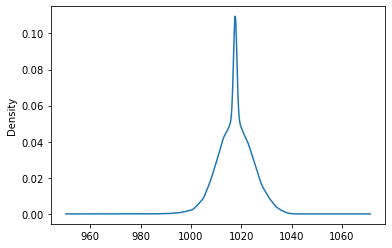

In [92]:
#Median Imputation
data['Pressure9am'].fillna(data['Pressure9am'].median()).plot(kind='kde')

In [93]:
# The distribution is changed after median imputation, we cant fill null values with its median.


In [94]:
#.Pressure3pm
data['Pressure3pm'].describe()

count    90188.000000
mean      1015.242128
std          7.032167
min        977.100000
25%       1010.400000
50%       1015.200000
75%       1020.000000
max       1039.600000
Name: Pressure3pm, dtype: float64

<AxesSubplot:ylabel='Density'>

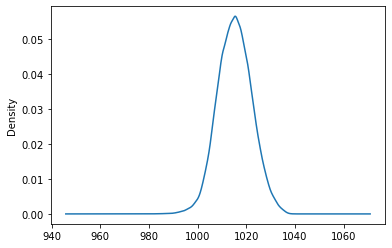

In [95]:
# distribution before imputation
data['Pressure3pm'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

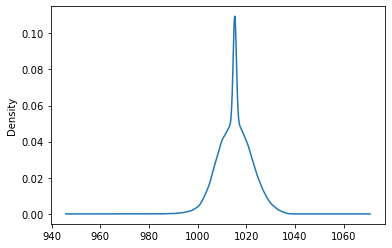

In [96]:
# distribution after mean imputation
data['Pressure3pm'].fillna(data['Pressure3pm'].mean()).plot(kind='kde')

In [97]:
# The distribution is changed after mean imputation, we cant fill null values with its mean.

<AxesSubplot:ylabel='Density'>

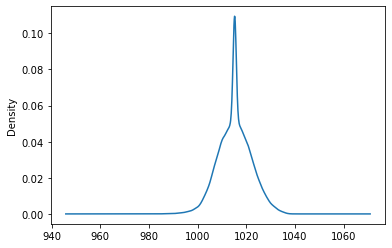

In [98]:
#Median Imputation
data['Pressure3pm'].fillna(data['Pressure3pm'].median()).plot(kind='kde')

In [99]:
# The distribution is changed after median imputation, we cant fill null values with its median.

In [100]:
# The distribution is changed after imputing with median, we cant use median to fill null values.


In [101]:
#.Temp9am
data['Temp9am'].describe()


count    99380.000000
mean        16.986879
std          6.500404
min         -7.200000
25%         12.300000
50%         16.700000
75%         21.600000
max         39.400000
Name: Temp9am, dtype: float64

<AxesSubplot:ylabel='Density'>

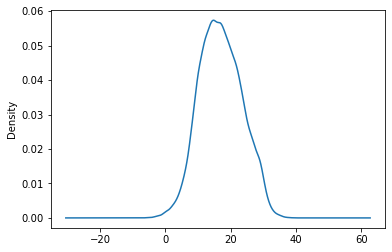

In [102]:
# distribution before imputation
data['Temp9am'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

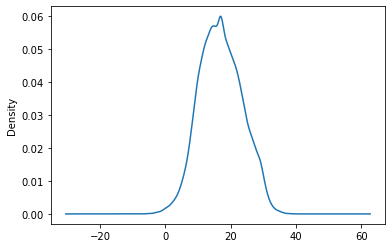

In [103]:
# Distribution after MEan Imputation
data['Temp9am'].fillna(data['Temp9am'].mean()).plot(kind='kde')

In [104]:
# the distribution changes slightly from the peak, we cant use mean for imputing it.
data['Temp9am'].fillna(data['Temp9am'].mean()).describe()

count    100000.000000
mean         16.986879
std           6.480221
min          -7.200000
25%          12.300000
50%          16.800000
75%          21.600000
max          39.400000
Name: Temp9am, dtype: float64

<AxesSubplot:ylabel='Density'>

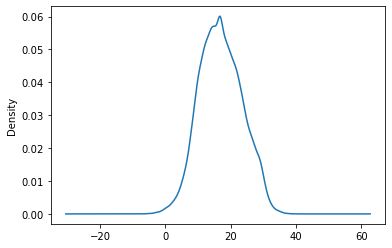

In [105]:
#Distribution after median imputation
data['Temp9am'].fillna(data['Temp9am'].median()).plot(kind='kde')

In [106]:
# the distribution changes slightly from the peak, we cant use median for imputing it.
data['Temp9am'].fillna(data['Temp9am'].median()).describe()

count    100000.00000
mean         16.98510
std           6.48026
min          -7.20000
25%          12.30000
50%          16.70000
75%          21.60000
max          39.40000
Name: Temp9am, dtype: float64

In [107]:
#Temp3pm
data['Temp3pm'].describe()

count    98090.000000
mean        21.685637
std          6.940969
min         -5.400000
25%         16.600000
50%         21.100000
75%         26.400000
max         46.700000
Name: Temp3pm, dtype: float64

<AxesSubplot:ylabel='Density'>

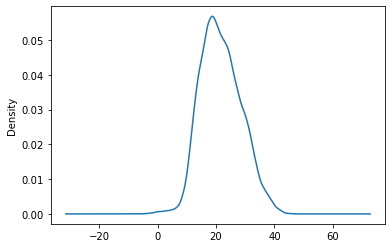

In [108]:
# distribution before imputation
data['Temp3pm'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

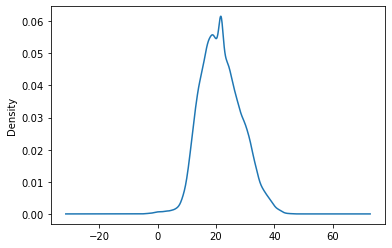

In [109]:
# distribution sfter Mean imputation
data['Temp3pm'].fillna(data['Temp3pm'].mean()).plot(kind='kde')

In [110]:
# the distribution changes slightly from the peak, we cant use mean for imputing it.

<AxesSubplot:ylabel='Density'>

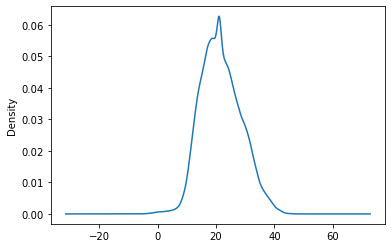

In [111]:
# distribution after Median imputation
data['Temp3pm'].fillna(data['Temp3pm'].median()).plot(kind='kde')

In [112]:
# the distribution changes slightly from the peak, we cant use median for imputing it.

In [113]:
#Conclusions
# MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm are filled with mean.

# COLUMNS required other imputation techniques
#1.WindGustSpeed
#2.Humidity9am
#3.Humidity3pm
#4.Pressure9am
#5.Pressure3pm
#6.Temp9am
#7.Temp3pm

In [114]:
#d.Groupby based imputation
# WindGustSpeed

#data['WindGustSpeed'].fillna(data.groupby(['WindGustDir'])['WindGustSpeed'].transform('mean')).plot(kind='kde')


In [115]:
#data['WindGustSpeed'].fillna(data.groupby(['WindGustDir'])['WindGustSpeed'].transform('mean')).describe()

In [116]:
#data['WindGustSpeed'].fillna(data.groupby('WindGustDir')['WindGustSpeed'].transform('mean')).isnull().sum()

count    93460.000000
mean        39.986818
std         13.589459
min          7.000000
25%         31.000000
50%         39.000000
75%         48.000000
max        135.000000
Name: WindGustSpeed, dtype: float64

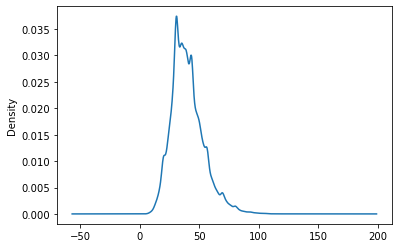

In [117]:
data['WindGustSpeed'].plot(kind='kde')
data['WindGustSpeed'].describe()

In [118]:
#data['WindGustSpeed'].fillna(data.groupby(['Location'])['WindGustSpeed'].transform('mean')).plot(kind='kde')

In [119]:

#data['WindGustSpeed'].fillna(data.groupby(['Location'])['WindGustSpeed'].transform('mean')).isnull().sum()

In [120]:
# GRoupby for WindGustSpeed using categorical columns Location and WindGustDir is not possible, both have lots of 
#null values after imputing with them

In [121]:
#Rule Based Imputation
# we can impute null values in WindGustSpeed with average of WindGustSpeed9am and WindSpeed3pm

ind=data[data['WindGustSpeed'].isnull()].index
print(len(ind))

6540


In [122]:
for i in ind:
    data.loc[i,'WindGustSpeed']=(data.loc[i,'WindSpeed9am']+data.loc[i,'WindSpeed3pm'])/2


In [123]:
data['WindGustSpeed'].isnull().sum()

0

<AxesSubplot:ylabel='Density'>

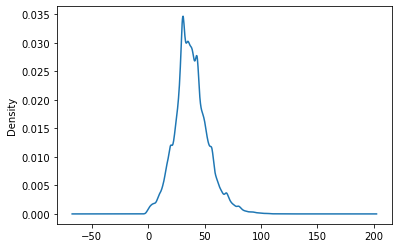

In [124]:
data['WindGustSpeed'].plot(kind='kde')

In [125]:
data['WindGustSpeed'].describe()

count    100000.000000
mean         38.303656
std          14.744393
min           0.000000
25%          30.000000
50%          37.000000
75%          46.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [126]:
#2.Humidity9am
data['Humidity9am'].isnull().sum()

1238

In [127]:
data['Humidity9am'].describe()

count    98762.000000
mean        68.845599
std         19.064754
min          1.000000
25%         57.000000
50%         70.000000
75%         83.000000
max        100.000000
Name: Humidity9am, dtype: float64

<AxesSubplot:ylabel='Density'>

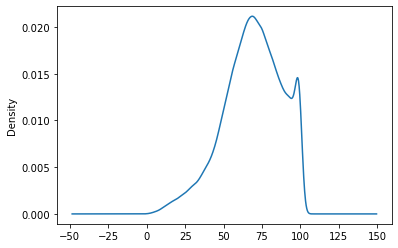

In [128]:
data['Humidity9am'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

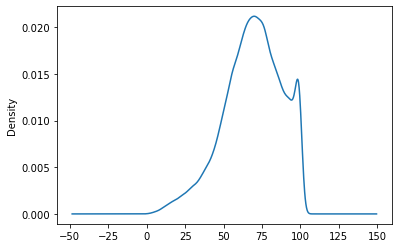

In [129]:
data['Humidity9am'].fillna(data.groupby(['Location'])['Humidity9am'].transform('mean')).plot(kind='kde')

In [130]:
data['Humidity9am'].fillna(data.groupby(['Location'])['Humidity9am'].transform('mean')).describe()
data['Humidity9am']=data['Humidity9am'].fillna(data.groupby(['Location'])['Humidity9am'].transform('mean'))

<AxesSubplot:ylabel='Density'>

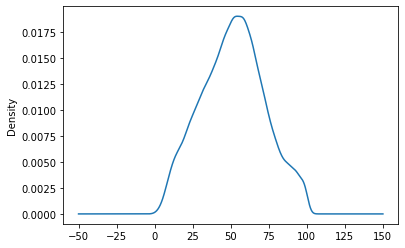

In [131]:
data['Humidity3pm'].plot(kind='kde')

In [132]:
data['Humidity3pm'].describe()

count    97456.000000
mean        51.491155
std         20.824180
min          0.000000
25%         37.000000
50%         52.000000
75%         66.000000
max        100.000000
Name: Humidity3pm, dtype: float64

<AxesSubplot:ylabel='Density'>

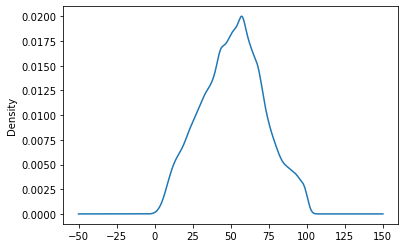

In [133]:
data['Humidity3pm'].fillna(data.groupby(['Location'])['Humidity3pm'].transform('mean')).plot(kind='kde')

In [134]:
data['Humidity3pm']=data['Humidity3pm'].fillna(data.groupby(['Location'])['Humidity3pm'].transform('mean'))
data['Humidity3pm'].isnull().sum()

0

In [135]:
data['Pressure9am'].describe()

count    90163.000000
mean      1017.631809
std          7.105450
min        980.500000
25%       1012.900000
50%       1017.600000
75%       1022.400000
max       1041.000000
Name: Pressure9am, dtype: float64

<AxesSubplot:ylabel='Density'>

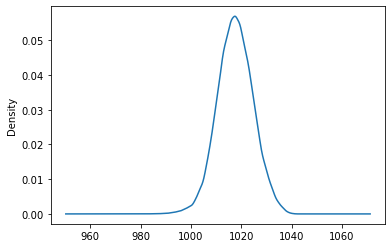

In [136]:
data['Pressure9am'].plot(kind='kde')

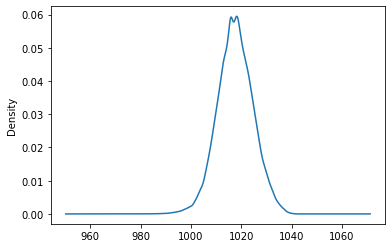

In [137]:
data['Pressure9am'].fillna(data.groupby(['Location'])['Pressure9am'].transform('mean')).plot(kind='kde')
data['Pressure9am']=data['Pressure9am'].fillna(data.groupby(['Location'])['Pressure9am'].transform('mean'))

In [138]:
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure9am'].isnull().sum()

0

In [139]:

data['Pressure3pm']=data['Pressure3pm'].fillna(data.groupby(['Location'])['Pressure3pm'].transform('mean'))
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Pressure3pm'].isnull().sum()

0

In [140]:
data['Temp9am'].describe()

count    99380.000000
mean        16.986879
std          6.500404
min         -7.200000
25%         12.300000
50%         16.700000
75%         21.600000
max         39.400000
Name: Temp9am, dtype: float64

<AxesSubplot:ylabel='Density'>

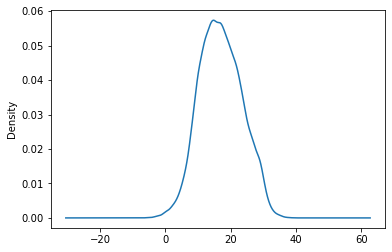

In [141]:
data['Temp9am'].plot(kind='kde')

In [142]:
data['Temp9am']=data['Temp9am'].fillna(data.groupby(['Location'])['Temp9am'].transform('mean'))
data['Temp9am'].fillna(data.groupby(['Location'])['Temp9am'].transform('mean')).describe()

count    100000.000000
mean         16.963384
std           6.502501
min          -7.200000
25%          12.200000
50%          16.700000
75%          21.600000
max          39.400000
Name: Temp9am, dtype: float64

In [ ]:
data['Temp9am'].fillna(data.groupby(['Location'])['Temp9am'].transform('mean')).plot(kind='kde')

In [ ]:
data['Temp3pm'].describe()

In [ ]:
data['Temp3pm'].plot(kind='kde')

In [ ]:
data['Temp3pm']=data['Temp3pm'].fillna(data.groupby(['Location'])['Temp3pm'].transform('mean'))
data['Temp3pm'].fillna(data.groupby(['Location'])['Temp3pm'].transform('mean')).describe()

In [ ]:
data['Temp3pm'].fillna(data.groupby(['Location'])['Temp3pm'].transform('mean')).plot(kind='kde')

In [ ]:
#e.	Explore mode based and rule based imputation for categorical columns
data_num=data.select_dtypes(exclude=np.number)
data_num.columns


In [ ]:
data_num.isnull().sum()

In [ ]:
data_num['RainToday'].fillna(data['RainToday'].mode()[0])

In [ ]:
data_num['RainToday'].value_counts()

In [ ]:
# Here mode is 'No' 


In [ ]:
#rule based imputation for RainToday column
ind=data[data['RainToday'].isnull()].index

In [ ]:
for i in ind:
    if data.loc[i,'Rainfall']<=1:
        data.loc[i,'RainToday']='No'
    else:
        data.loc[i,'RainToday']='Yes'

In [ ]:
data['RainToday'].isnull().sum()

In [ ]:
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])

In [ ]:
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])

In [ ]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])

In [ ]:
data.isnull().sum()

## 9.	Comment about the Normality of each numerical feature in the dataset.

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
num_data=data.select_dtypes(include=np.number)


In [ ]:
for i in num_data.columns:
    sb.boxplot(x=num_data[i])
    plt.show()

In [ ]:
for i in num_data.columns:
    num_data[i].plot(kind='kde')
    plt.title(i)
    plt.show()

In [ ]:
# The MinTemp, MaxTemp, Temp9am, Temp3pm, Pressure9am, Pressure3pm, Humidity3pm are folllowing normal distribution.


In [ ]:
# The percentage of outliers in numerical data columns:

for i in num_data.columns:
    skew1=num_data[i].skew()
    print("The skewness in the column",i ,"is", skew1)



In [ ]:
for i in num_data.columns:
    num_data[i].plot(kind='kde')
    plt.show()

## 10.	Apply transformations to make the data close to Normal distribution 

In [ ]:
num_data=data.select_dtypes(include=np.number)
# LOG Transformation for WindSpeed9am
sb.distplot(x=num_data['WindSpeed9am'])
plt.show()
sb.distplot(x=np.power(num_data['WindSpeed9am'],2))
plt.show()



In [ ]:
num_data=data.select_dtypes(include=np.number)
# 
sb.distplot(x=num_data['WindGustSpeed'])
plt.show()
sb.distplot(x=np.power(num_data['WindGustSpeed'],2.5))
plt.show()


In [ ]:
num_data=data.select_dtypes(include=np.number)
# 
sb.distplot(x=num_data['WindSpeed3pm'])
plt.show()
sb.distplot(x=np.power(num_data['WindSpeed3pm'],.27))
plt.show()



## 11.	Apply all three types of scaling on numeric columns

In [ ]:
# Standard Scalar
num_data=data.select_dtypes(include=np.number)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_data_sc=sc.fit_transform(num_data)
num_data_sc=pd.DataFrame(num_data_sc)
num_data_sc.columns=num_data.columns
num_data_sc.head(3)
# checking mean and standard deviation after applying standardscaler
print(num_data_sc.mean().round())
print(num_data_sc.std().round())
print(num_data_sc.max())
# WindGustSpeed,Rainfall,WindSpeed9am,WindSpeed3pm have outliers on upper bound
print(num_data_sc.min())
#PRessure9am and Pressure3pm have lower bound outlier


In [ ]:
#MinMax Scaler
num_data=data.select_dtypes(include=np.number)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
num_data_mm=mm.fit_transform(num_data)
num_data_mm=pd.DataFrame(num_data_mm)
num_data_mm.columns=num_data.columns
num_data_mm.head(3)
num_data_mm.describe()

In [ ]:
#RobustScaler
num_data=data.select_dtypes(include=np.number)
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
num_data_rb=rb.fit_transform(num_data)
num_data_rb=pd.DataFrame(num_data_rb)
num_data_rb.columns=num_data.columns
num_data_rb.head(3)


## 12.	Apply appropriate Encodings on each categorical columns.

In [ ]:
cat_data=data.select_dtypes(exclude=np.number)


In [ ]:
cat_data

In [ ]:
data['RainToday']=data['RainToday'].replace({'Yes':1,'No':0})
data['RainTomorrow']=data['RainTomorrow'].replace({'Yes':1,'No':0})

In [ ]:
data.head(4)

In [ ]:
#FRequency Encoder 
# we can simply use frequency encoding for columns (WindDir9am,WindDir3pm,WindGustDir)
tab=data['WindDir3pm'].value_counts()
data['WindDir3pm']=data['WindDir3pm'].map(tab)
tab=data['WindDir9am'].value_counts()
data['WindDir9am']=data['WindDir9am'].map(tab)
tab=data['WindGustDir'].value_counts()
data['WindGustDir']=data['WindGustDir'].map(tab)

In [ ]:
data.head(10)

In [ ]:
# For Locations
data['Location'].nunique()


In [ ]:
len(data['Location'].value_counts())

In [ ]:
# all the frequency count is unique we can use Frequency Encoder for Location as well
tab=data['Location'].value_counts()
data['Location']=data['Location'].map(tab)

In [ ]:
data.head(3)

In [ ]:
# All the columns are having numerical numbers.